In [46]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import numpy as np
import os, sys
import scipy
import math
from scipy import stats
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import random
    

def TTest(AllTest):
    """Perform a student T-test using all the data """
    TTest_Output=[[],[],[],[]]
    for i in range(4):
        for j in range(4):
            Temp_Pval=stats.ttest_ind(AllTest[i],AllTest[j])
            TTest_Output[i].append(str("{0:.4f}".format(Temp_Pval[1])))
            #TTest_Output[i].append(str(Temp_Pval[1]))
    return (TTest_Output)

def KsTest(AllTest):
    """Perform a KS-test using all the data """
    Ks_Output=[[],[],[],[]]
    for i in range(4):
        for j in range(4):
            Temp_Pval=stats.ks_2samp(AllTest[i],AllTest[j])
            Ks_Output[i].append(str("{0:.4f}".format(Temp_Pval[1])))

    return (Ks_Output)

def TTestRandomSample(AllTest,n): 
    """Perform a student T-test sampling n from the data """
    #n=20; #number of random samples of the data
    TS_Output=[[],[],[],[]]
    for i in range(4):
        for j in range(4):
            TempList=[]
            for k in range(1000):
                A=[random.choice(AllTest[i]) for _ in range(n)]
                B=[random.choice(AllTest[j]) for _ in range(n)]
                #A=random.sample(AllTest[i], n)
                #B=random.sample(AllTest[j], n)
                Temp=stats.ttest_ind(A,B)
                TempList.append(Temp[1])
            TS_Output[i].append(str("{0:.4f}".format(np.mean(TempList))))
    return(TS_Output)

def KsTestRandomSample(AllTest,n): 
    """Perform a KS-test sampling n from the data. Calculate both p-value and difference in mean between the two data sets"""
    #n=20; #number of random samples of the data
    KS_Output=[[],[],[],[]]
    KS_Output_Mean=[[],[],[],[]]
    for i in range(4):
        for j in range(4):
            TempList=[]
            TempListMean=[]
            for k in range(1000):
                A=[random.choice(AllTest[i]) for _ in range(n)]
                B=[random.choice(AllTest[j]) for _ in range(n)]
                #A=random.sample(AllTest[i], n)
                #B=random.sample(AllTest[j], n)

                Temp_A=np.mean(A)
                Temp_B=np.mean(B)
                Temp=stats.ks_2samp(A,B)
                TempList.append(Temp[1])
                TempListMean.append(Temp_A-Temp_B)
            KS_Output[i].append(str("{0:.4f}".format(np.mean(TempList))))
            KS_Output_Mean[i].append(str("{0:.4f}".format(np.mean(TempListMean))))
    return(KS_Output,KS_Output_Mean)

def KsTestRangeSampleSize(AllTest): 
    """Perform a Ks-Test for increasing sample size on C-D and B-D, to see at what value the p-value drops below 0.05 """
    #n=20; #number of random samples of the data

    KS_CB=[]
    KS_BD=[]
    KS_CA=[]
    KS_AD=[]
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[2]) for _ in range(k)]
            B=[random.choice(AllTest[1]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp=stats.ks_2samp(A,B)
            TempList.append(Temp[1])
        KS_CB.append(np.mean(TempList))
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[1]) for _ in range(k)]
            B=[random.choice(AllTest[3]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp=stats.ks_2samp(A,B)
            TempList.append(Temp[1])
        KS_BD.append(np.mean(TempList))
        
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[2]) for _ in range(k)]
            B=[random.choice(AllTest[0]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp=stats.ks_2samp(A,B)
            TempList.append(Temp[1])
        KS_CA.append(np.mean(TempList))
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[0]) for _ in range(k)]
            B=[random.choice(AllTest[3]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp=stats.ks_2samp(A,B)
            TempList.append(Temp[1])
        KS_AD.append(np.mean(TempList))
    return(KS_BD,KS_CB,KS_CA,KS_AD)

         
def MeanDiffRangeSampleSize(AllTest): 
    """Perform a Ks-Test for increasing sample size on C-D and B-D, to see at what value the p-value drops below 0.05 """
    #n=20; #number of random samples of the data

    Mean_diff_CB=[]
    Mean_diff_BD=[]
    Mean_diff_CA=[]
    Mean_diff_AD=[]
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[2]) for _ in range(k)]
            B=[random.choice(AllTest[1]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp_A=np.mean(A)
            Temp_B=np.mean(B)
            Temp=abs(Temp_A-Temp_B)/(Temp_A+Temp_B)
            TempList.append(Temp)
        Mean_diff_CB.append(np.mean(TempList))
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[1]) for _ in range(k)]
            B=[random.choice(AllTest[3]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp_A=np.mean(A)
            Temp_B=np.mean(B)
            Temp=abs(Temp_A-Temp_B)/(Temp_A+Temp_B)
            TempList.append(Temp)
        Mean_diff_BD.append(np.mean(TempList))
        
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[2]) for _ in range(k)]
            B=[random.choice(AllTest[0]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp_A=np.mean(A)
            Temp_B=np.mean(B)
            Temp=abs(Temp_A-Temp_B)/(Temp_A+Temp_B)
            TempList.append(Temp)
        Mean_diff_CA.append(np.mean(TempList))
    for k in range(1,101):
        TempList=[]
        for p in range(1000):
            A=[random.choice(AllTest[0]) for _ in range(k)]
            B=[random.choice(AllTest[3]) for _ in range(k)]
            #A=random.sample(AllTest[i], n)
            #B=random.sample(AllTest[j], n)
            Temp_A=np.mean(A)
            Temp_B=np.mean(B)
            Temp=abs(Temp_A-Temp_B)/(Temp_A+Temp_B)
            TempList.append(Temp)
        Mean_diff_AD.append(np.mean(TempList))
    return(Mean_diff_BD, Mean_diff_CB,Mean_diff_CA,Mean_diff_AD)

In [47]:
def main():
    """
    Do statistical analysis on the four data sets given to me by Pauline. 
    """

#Read in data
InputFile="WT_vs_bot17_anisotropy.csv"
f2=open(InputFile,"r")
lines=f2.readlines()  

#Break data into four matricies
AllTest=[[],[],[],[]]
for x in lines: 
    x=x.split(",")
    for j,i in enumerate(x):
        i=i.rstrip()
        if i:
            AllTest[j].append(float(i))


#Calculate all the test statistics
 #TTest_Output=TTest(AllTest)
#TTest_Sampled=TTestRandomSample(AllTest,20)
KsAll=KsTest(AllTest)
Ks_Sampled,KS_Sampled_mean=KsTestRandomSample(AllTest,20)
KS_BD,KS_CB,KS_CA,KS_AD=KsTestRangeSampleSize(AllTest)
Mean_diff_BD,Mean_diff_CB,Mean_diff_CA,Mean_diff_AD=MeanDiffRangeSampleSize(AllTest)

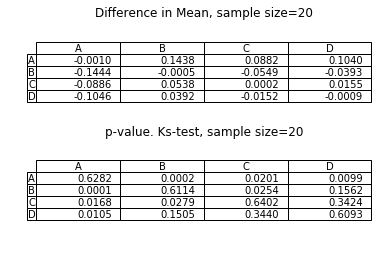

In [43]:
#plot graphs
fig, ax = plt.subplots(2,1)
#fig=plt.figure(figsize=(15,15), dpi= 80, facecolor='w', edgecolor='k')
t=ax[0].table(cellText=KS_Sampled_mean, colLabels='ABCD', rowLabels='ABCD', loc='center',fontsize='20')  
#t[0,1]=matplotlib.table.Cell((t[0,1].x,t[0,1].y))
ax[0].axis("off")
ax[0].set_title('Difference in Mean, sample size=20')
ax[1].table(cellText=Ks_Sampled, colLabels='ABCD', rowLabels='ABCD', loc='center',fontsize='20')  
ax[1].axis("off")
ax[1].set_title('p-value. Ks-test, sample size=20')
#ax[0].set_aspect(0.8)
#ax[1].set_aspect(0.8)
plt.savefig('BootstrapTests_PaulineAnonymisedData_WT_bot17.png', dpi=96, facecolor='w', edgecolor='w',
         orientation='portrait', papertype=None, format=None,
         transparent=False, bbox_inches= 'tight', pad_inches=0.1,
        frameon=None)

plt.show()   
#print(t[0,0])
#print(KS_Sampled_mean)

if __name__ == '__main__':
    main()

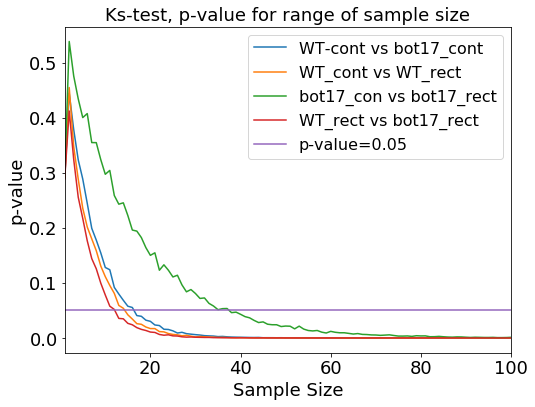

In [50]:
# Set up a figure with set of axes
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.set_xlabel('Sample Size', fontsize=18)
ax.set_ylabel('p-value', fontsize=18)
x=[i for i in range(1,101)]
ax.plot(x, KS_CB, label='WT-cont vs bot17_cont')    
ax.plot(x, KS_CA, label='WT_cont vs WT_rect')
ax.plot(x, KS_BD, label='bot17_con vs bot17_rect')
ax.plot(x, KS_AD, label='WT_rect vs bot17_rect')
y=[0.05 for i in range(1,101)]
ax.plot(x, y, label='p-value=0.05')
plt.legend(fontsize=16)

ax.set_title('Ks-test, p-value for range of sample size', fontsize=18) 
ax.set_xlim(1,100)

# Add a legend
#plt.legend(('untreated control','untreated rectangle','oryzalin control','oryzalin rectangle'), loc='upper left',fontsize=18);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#save figure as a pdf
plt.savefig('bootstrap sample size pvalue evolution_WT_bot17.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()

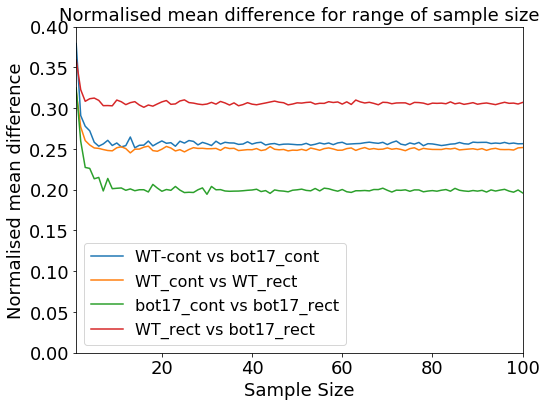

In [51]:
# Set up a figure with set of axes
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.set_xlabel('Sample Size', fontsize=18)
ax.set_ylabel('Normalised mean difference', fontsize=18)
x=[i for i in range(1,101)]
ax.plot(x, Mean_diff_CB, label='WT-cont vs bot17_cont')    
ax.plot(x, Mean_diff_CA, label='WT_cont vs WT_rect')
ax.plot(x, Mean_diff_BD, label='bot17_cont vs bot17_rect')
ax.plot(x, Mean_diff_AD, label='WT_rect vs bot17_rect')
y=[0.05 for i in range(1,101)]
# ax.plot(x, y, label='p-value=0.05')
plt.legend(fontsize=16)

ax.set_title('Normalised mean difference for range of sample size', fontsize=18) 
ax.set_xlim(1,100)
ax.set_ylim(0,0.4)

# Add a legend
#plt.legend(('untreated control','untreated rectangle','oryzalin control','oryzalin rectangle'), loc='upper left',fontsize=18);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#save figure as a pdf
plt.savefig('bootstrap sample size evolution_WT_bot17_mean_diff_norm.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()